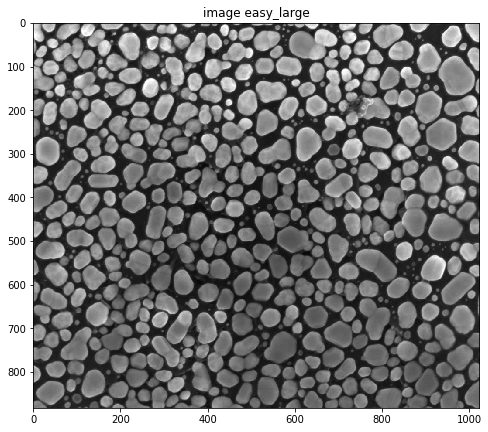

In [185]:
from skimage.measure import regionprops
import Dataset
import numpy as np
from Utils import visualize
from Utils import image_to_grayscale
from skimage import color

dataset_list = Dataset.get_full_dataset()
INDEX = 6
data = dataset_list[INDEX]
image, title = data['image'], data['title']

visualize(image, f'image {title}')

image = color.rgb2gray(image)


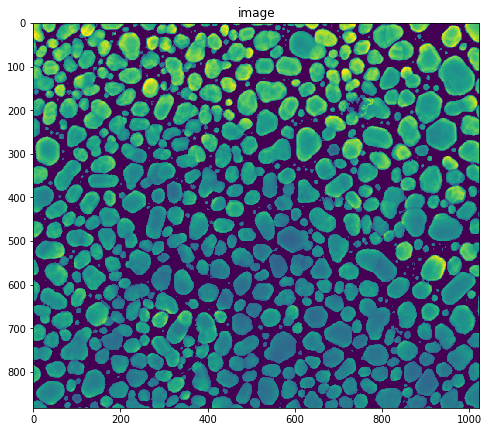

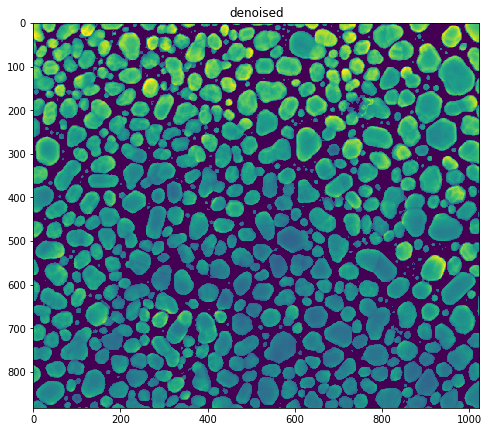

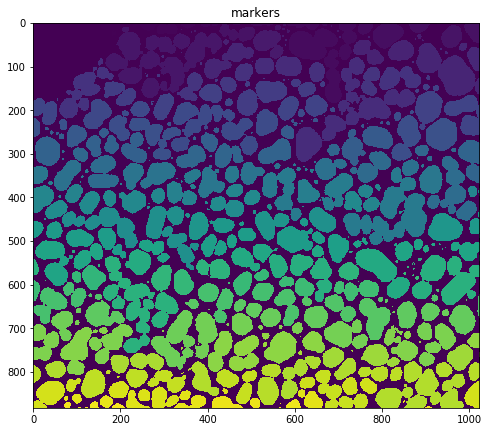

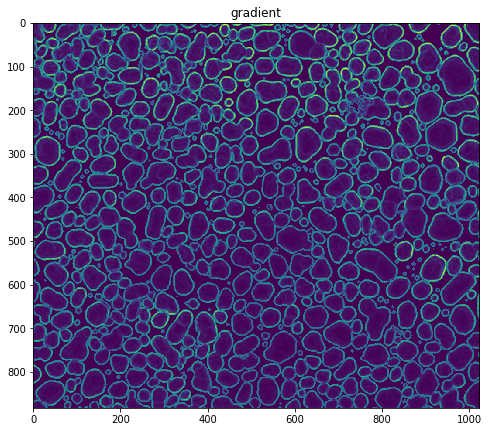

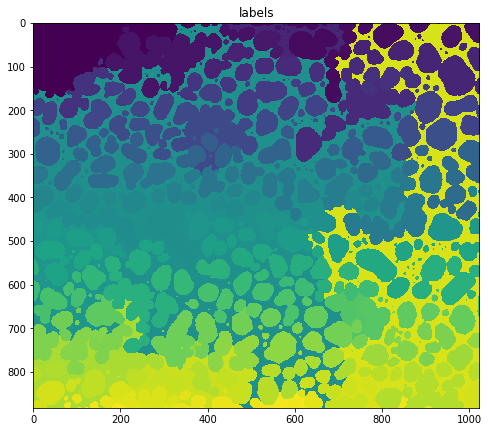

Amount: 422


In [186]:
from scipy.ndimage import label
from skimage import img_as_ubyte, color
from skimage.filters import rank
from skimage.morphology import disk, watershed

# Remove background
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        if image[x][y] < 0.25:
            image[x][y] = 0

visualize(image, 'image')

# denoise image
denoised = rank.median(image, disk(1))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = denoised > 60
markers, amount = label(markers)

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

visualize(denoised, 'denoised')
visualize(markers, 'markers')
visualize(gradient, 'gradient')
visualize(labels, 'labels')

print(f'Amount: {amount}')

In [187]:
MAX_REG = 10000
MIN_REG = 1

total_counter = 0

for region in regionprops(labels):
    if not (MAX_REG > region.area > MIN_REG):
        continue
        
    total_counter += 1

print(f'total_counter {total_counter}')

total_counter 410
